In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [95]:
df = pd.read_csv("drug_classification.csv")

In [96]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug_Type    200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [98]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [99]:
df["Drug_Type"].value_counts()

,count
Drug_Type,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


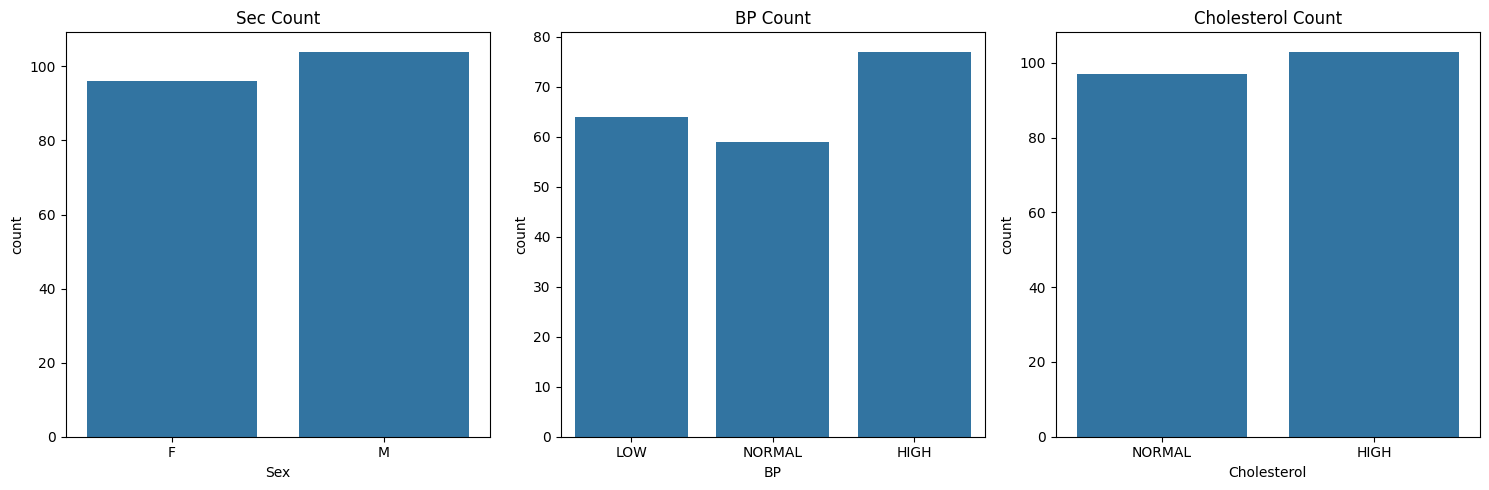

In [100]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Sex', data=df)
plt.title('Sec Count')

plt.subplot(1, 3, 2)
sns.countplot(x='BP', data=df, order=['LOW', 'NORMAL', 'HIGH'])
plt.title('BP Count')

plt.subplot(1, 3, 3)
sns.countplot(x='Cholesterol', data=df, order=['NORMAL', 'HIGH'])
plt.title('Cholesterol Count')
plt.tight_layout()

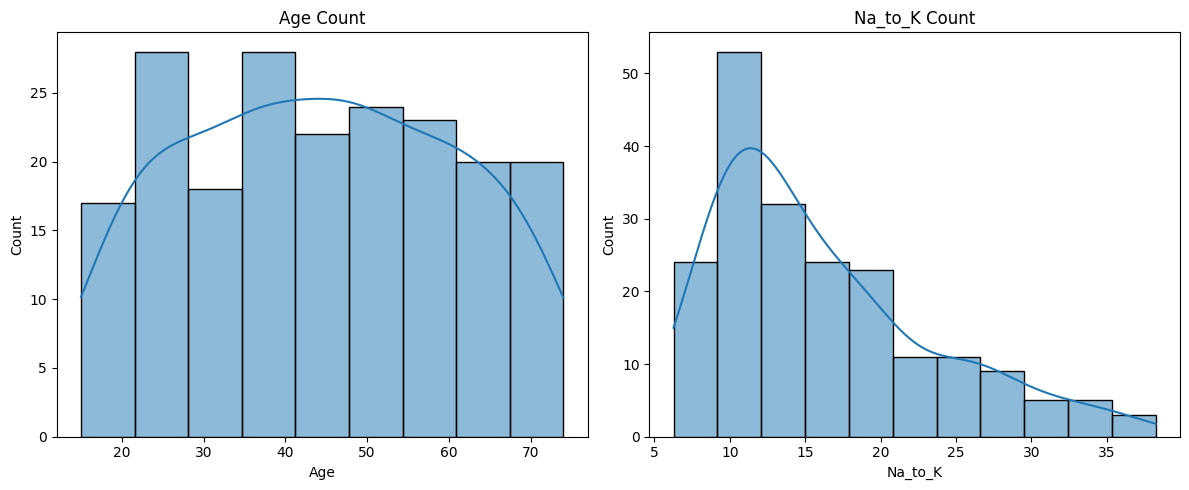

In [101]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Count')

plt.subplot(1, 2, 2)
sns.histplot(df['Na_to_K'], kde=True)
plt.title('Na_to_K Count')
plt.tight_layout()

In [102]:
df = pd.get_dummies(df, columns=['BP', 'Cholesterol'], drop_first=True)

In [103]:
# Label Encoding
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [104]:
X = df.drop('Drug_Type', axis=1)
y = df['Drug_Type']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [106]:
scaler = StandardScaler()
X_train[['Age', 'Na_to_K']] = scaler.fit_transform(X_train[['Age', 'Na_to_K']])
X_test[['Age', 'Na_to_K']] = scaler.transform(X_test[['Age', 'Na_to_K']])

print(X_train.head())
print("\n" + "="*50 + "\n")

          Age  Sex   Na_to_K  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
52   1.102455    1  1.573317    True      False                True
34   0.546401    1 -0.260863   False       True               False
113  1.287807    0 -0.312023    True      False                True
168  0.422833    0  0.985817    True      False                True
127 -0.565708    1 -1.144642   False       True                True




In [107]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine (SVM)": SVC(kernel='rbf', probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [108]:
model_performance = {}

--- Logistic Regression  ---
Accuracy: 0.9250
Classification Report:
              precision    recall  f1-score   support

       DrugY       0.86      1.00      0.92        18
       drugA       1.00      0.80      0.89         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.91      0.95        11

    accuracy                           0.93        40
   macro avg       0.97      0.88      0.91        40
weighted avg       0.94      0.93      0.92        40



--- K Nearest Neighbors (KNN)  ---
Accuracy: 0.8250
Classification Report:
              precision    recall  f1-score   support

       DrugY       0.83      0.83      0.83        18
       drugA       1.00      0.80      0.89         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      0.33      0.50         3
       drugX       0.73      1.00      0.85        11

    accuracy                           

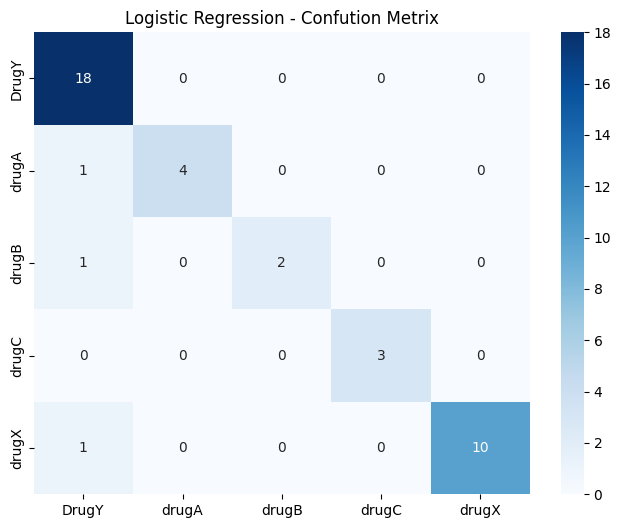

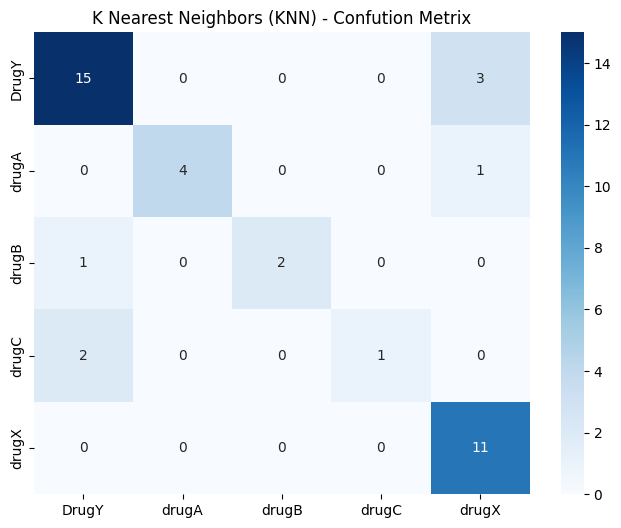

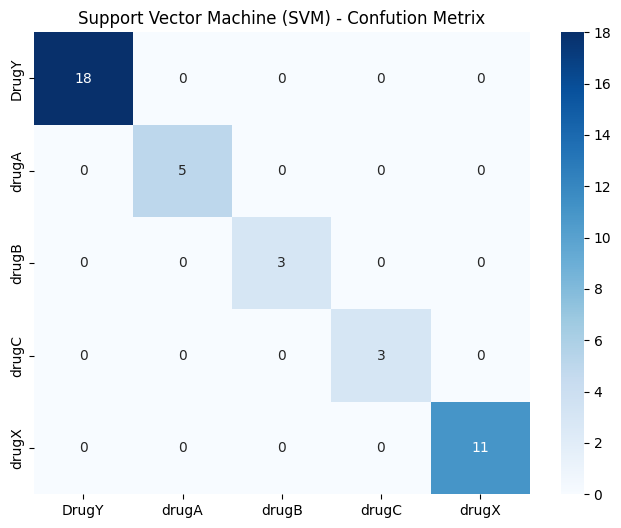

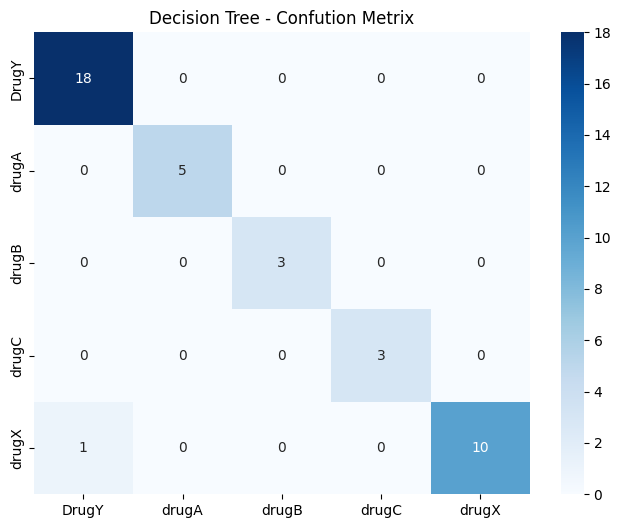

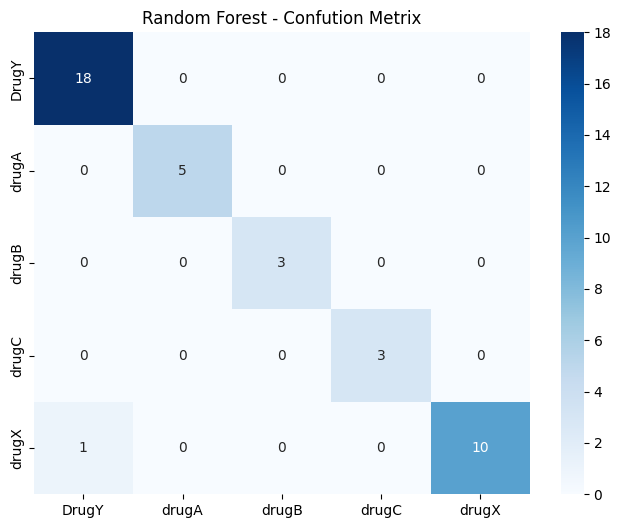

In [109]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    model_performance[name] = {
        'Accuracy': accuracy,
        'Classification Report': report,
        'Predictions': y_pred
    }

    print(f"--- {name}  ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y.values), yticklabels=np.unique(y.values))
    plt.title(f'{name} - Confution Metrix')
    print("\n" + "="*50 + "\n")


In [110]:
accuracy_scores = {name: data['Accuracy'] for name, data in model_performance.items()}

In [111]:
performance_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)

print("Accuracy of the Models:")
print(performance_df)

Accuracy of the Models:
                              Accuracy
Support Vector Machine (SVM)     1.000
Random Forest                    0.975
Decision Tree                    0.975
Logistic Regression              0.925
K Nearest Neighbors (KNN)        0.825


/tmp/ipython-input-443093296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df.index, y=performance_df['Accuracy'], palette='viridis')


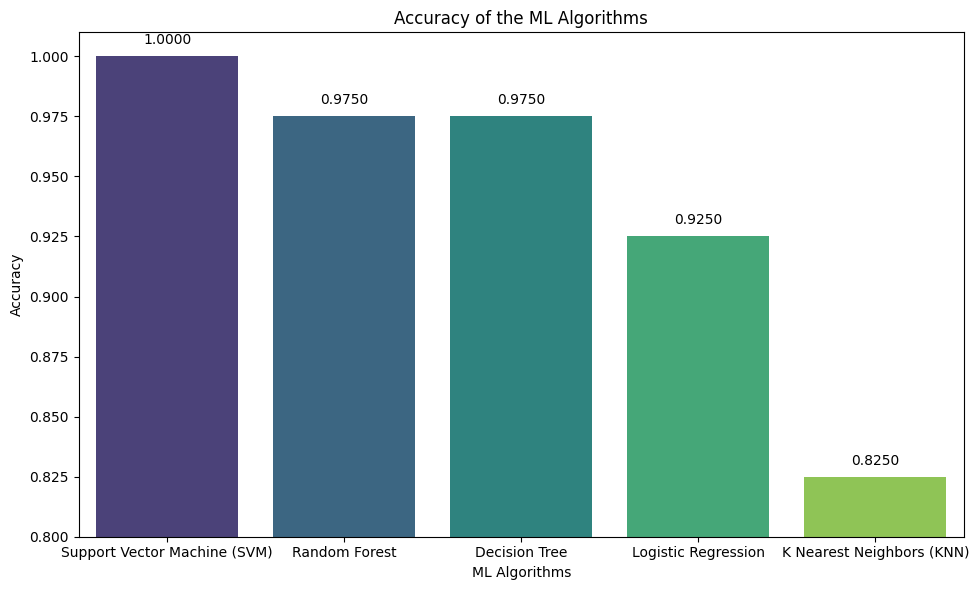

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(x=performance_df.index, y=performance_df['Accuracy'], palette='viridis')
plt.title('Accuracy of the ML Algorithms')
plt.xlabel('ML Algorithms')
plt.ylabel('Accuracy')
plt.xticks()
plt.ylim(0.8, 1.01)
for index, value in enumerate(performance_df['Accuracy']):
    plt.text(index, value + 0.005, f'{value:.4f}', ha='center')
plt.tight_layout()